In [1]:
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

In [3]:
#The dataset can be found here https://archive.ics.uci.edu/dataset/2/adult

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
df = pd.concat([X , y] , axis =1)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [7]:
df[df.isnull().any(axis =1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(47621, 15)

In [10]:
y = df['income'].apply(lambda x: 1 if x =='>50K' or x =='>50K.' else 0)

In [11]:
y.shape

(47621,)

In [12]:
y.dtype

dtype('int64')

In [13]:
df_dis = pd.DataFrame()
df_con = pd.DataFrame()

<Axes: xlabel='age', ylabel='count'>

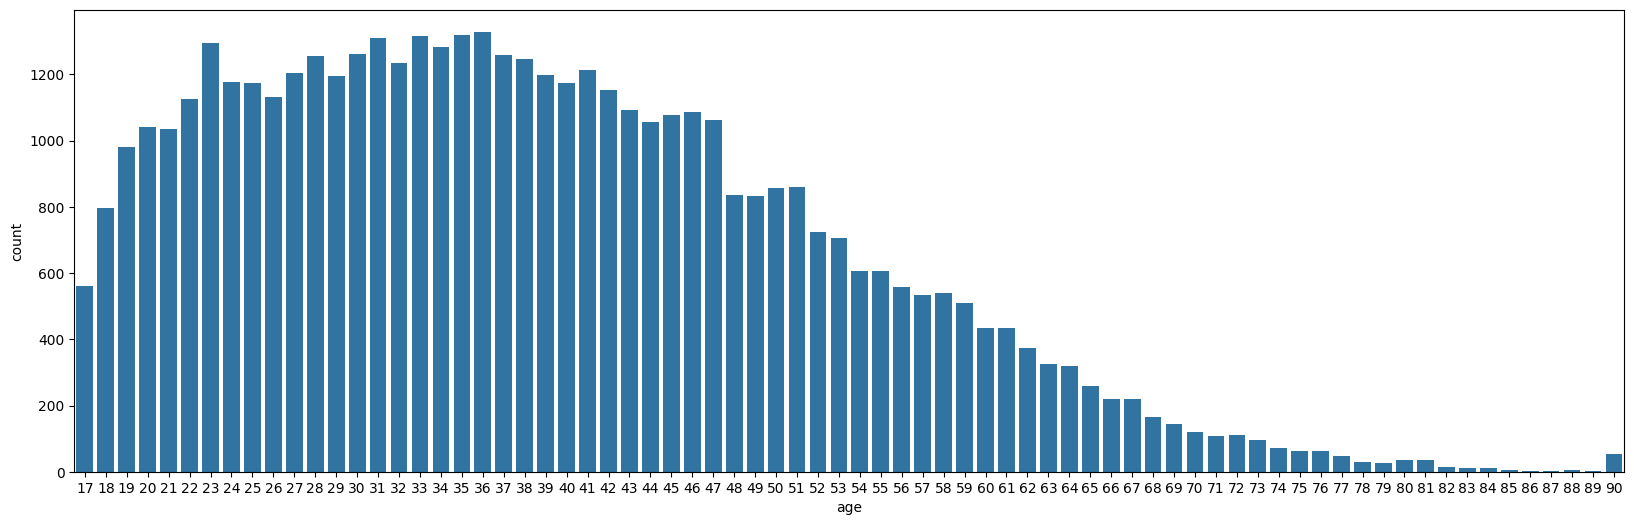

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(df , x='age')

In [15]:
def f(age):
  if age <= 20:
    return 1
  elif age <= 30:
    return 2
  elif age <= 40:
    return 3
  elif age <= 50:
    return 4
  elif age <= 60:
    return 5
  elif age <= 70:
    return 6
  elif age <= 80:
    return 7
  elif age <= 90:
    return 8


df_dis['age group'] = df['age'].apply(f)

In [16]:
df_dis.shape

(47621, 1)

In [17]:
df['workclass'].value_counts()

Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df['workclass'].isnull().sum()

0

<Axes: xlabel='workclass', ylabel='count'>

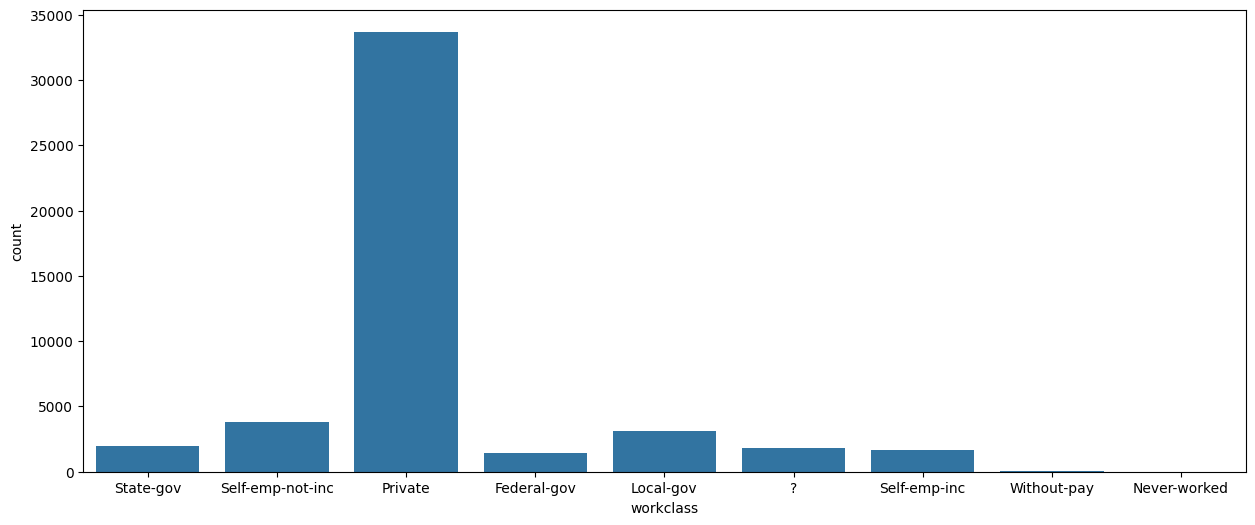

In [19]:
plt.figure(figsize=(15 , 6))
sns.countplot(df , x='workclass')

In [20]:
df_dis['workclass'] = df['workclass']

In [21]:
df['fnlwgt'].value_counts()

203488    21
120277    19
125892    18
126569    17
113364    17
          ..
205249     1
99096      1
244312     1
103214     1
350977     1
Name: fnlwgt, Length: 27946, dtype: int64

In [22]:
df['education'].value_counts()

HS-grad         15444
Some-college    10512
Bachelors        7881
Masters          2610
Assoc-voc        2034
11th             1746
Assoc-acdm       1566
10th             1336
7th-8th           912
Prof-school       819
9th               735
12th              633
Doctorate         582
5th-6th           494
1st-4th           239
Preschool          78
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

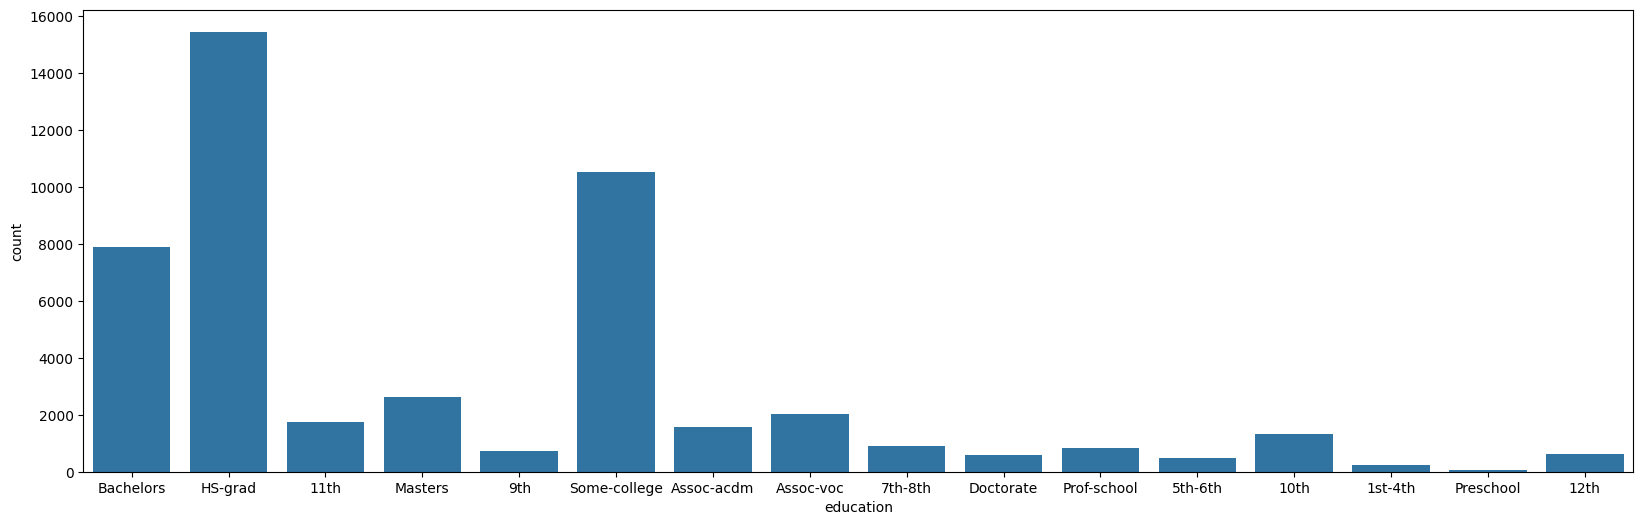

In [23]:
plt.figure(figsize=(20 ,6))
sns.countplot(df , x = 'education')

<Axes: xlabel='education-num', ylabel='count'>

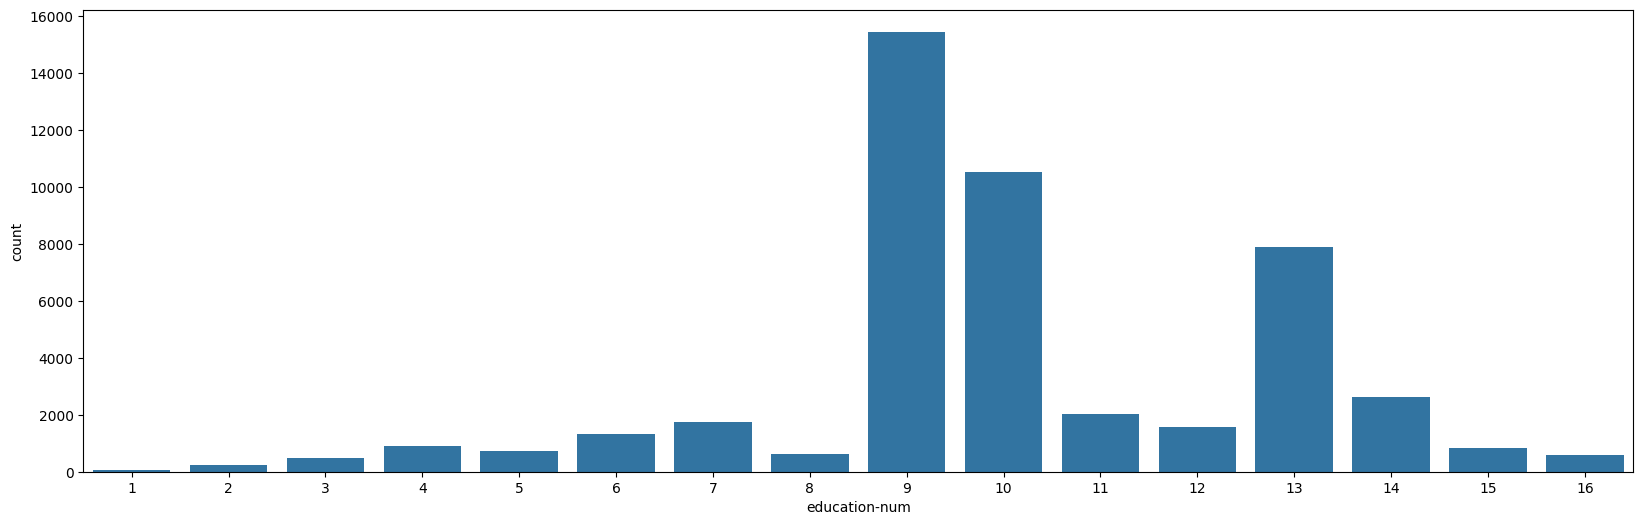

In [24]:
plt.figure(figsize=(20 ,6))
sns.countplot(df , x = 'education-num')

In [25]:
df['education-num'].value_counts()

9     15444
10    10512
13     7881
14     2610
11     2034
7      1746
12     1566
6      1336
4       912
15      819
5       735
8       633
16      582
3       494
2       239
1        78
Name: education-num, dtype: int64

In [26]:
df_dis['education'] = df['education']

In [27]:
df['marital-status'].value_counts()

Married-civ-spouse       21966
Never-married            15555
Divorced                  6526
Separated                 1497
Widowed                   1443
Married-spouse-absent      600
Married-AF-spouse           34
Name: marital-status, dtype: int64

<Axes: xlabel='marital-status', ylabel='count'>

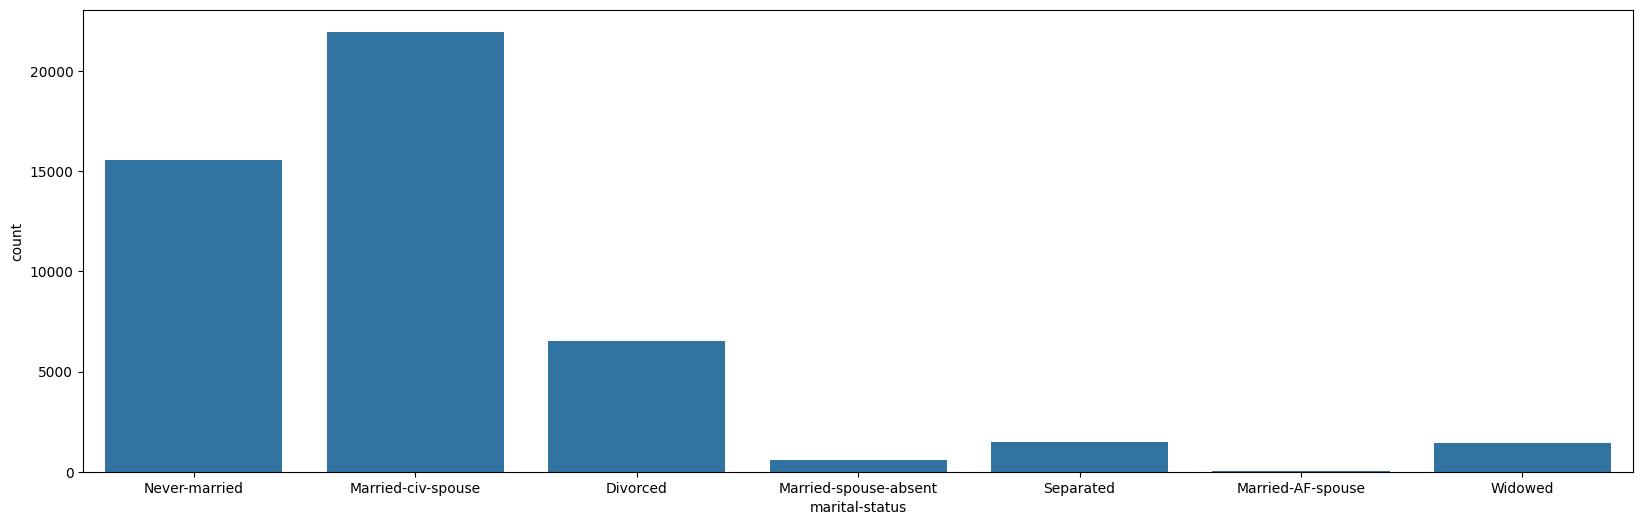

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(df , x = 'marital-status')

In [29]:
df_dis['marital-status'] = df['marital-status']

In [30]:
df['occupation'].value_counts()

Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
?                    1843
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: occupation, dtype: int64

<Axes: xlabel='occupation', ylabel='count'>

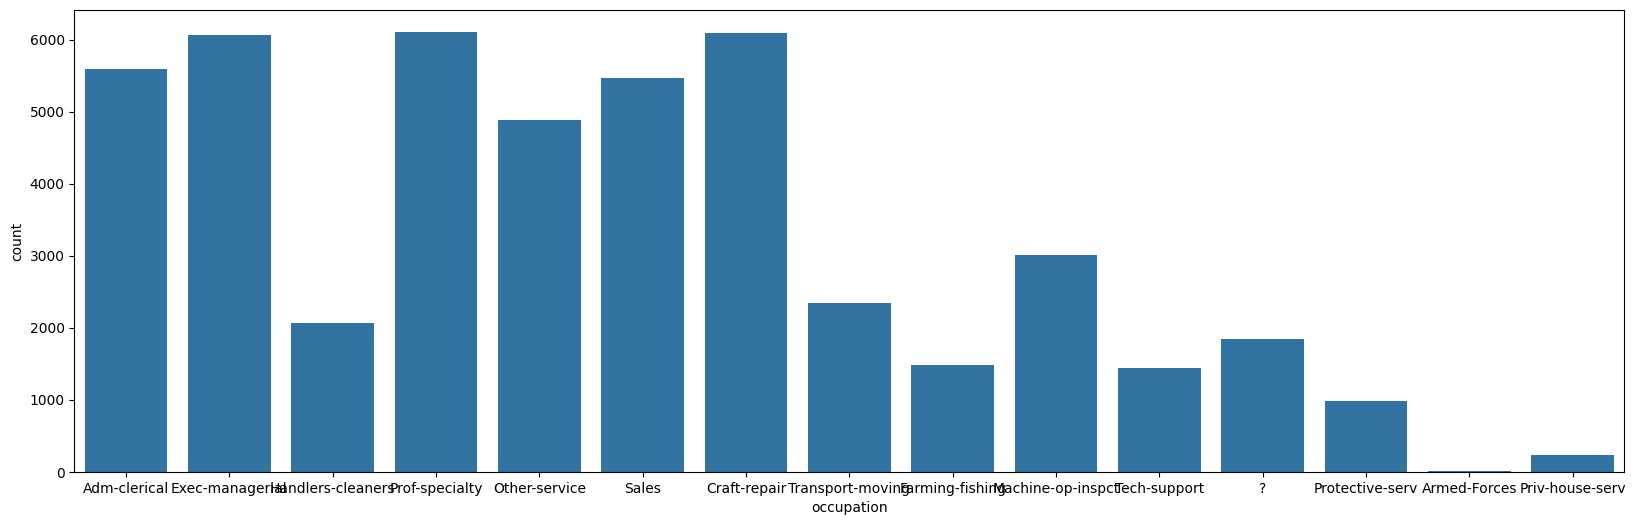

In [31]:
plt.figure(figsize=(20 ,6))
sns.countplot(df , x = 'occupation')

In [32]:
df_dis['occupation'] = df['occupation']

In [33]:
df['relationship'].value_counts()

Husband           19396
Not-in-family     12281
Own-child          7228
Unmarried          5022
Wife               2253
Other-relative     1441
Name: relationship, dtype: int64

<Axes: xlabel='relationship', ylabel='count'>

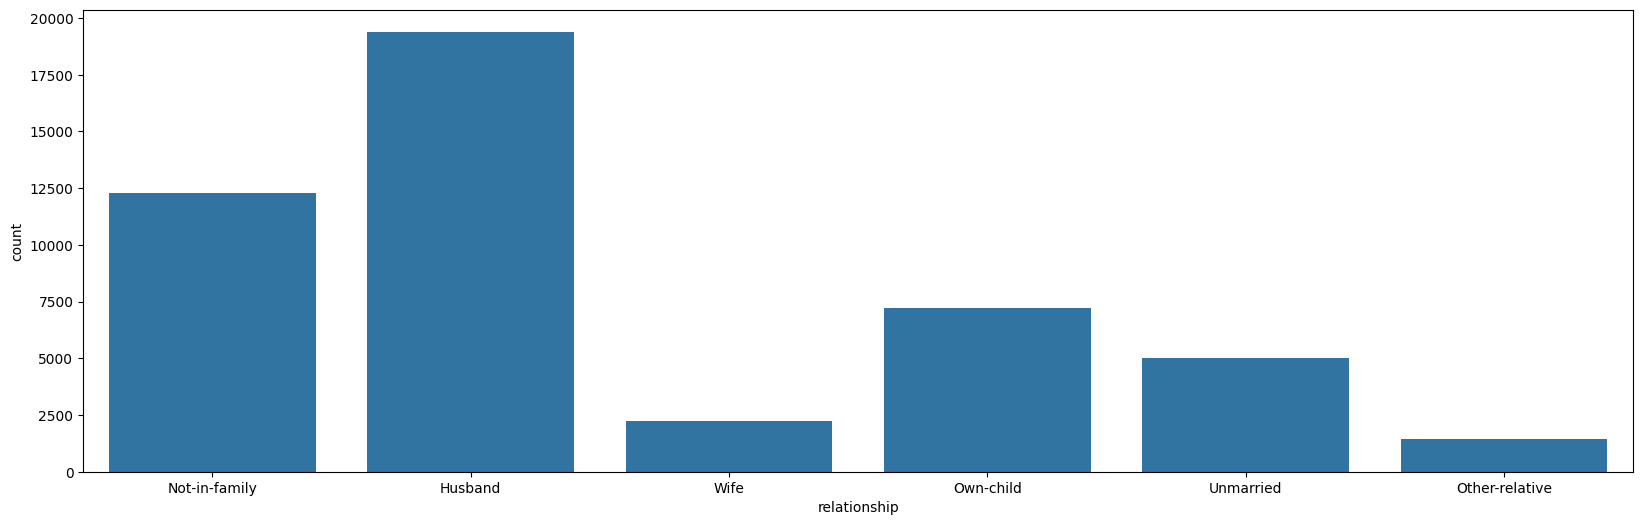

In [34]:
plt.figure(figsize=(20 ,6 ))
sns.countplot(df , x = 'relationship')

In [35]:
df_dis['relationship'] = df['relationship']

In [36]:
df_dis.shape

(47621, 6)

In [37]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [38]:
df['race'].value_counts()

White                 40786
Black                  4535
Asian-Pac-Islander     1447
Amer-Indian-Eskimo      460
Other                   393
Name: race, dtype: int64

<Axes: xlabel='race', ylabel='count'>

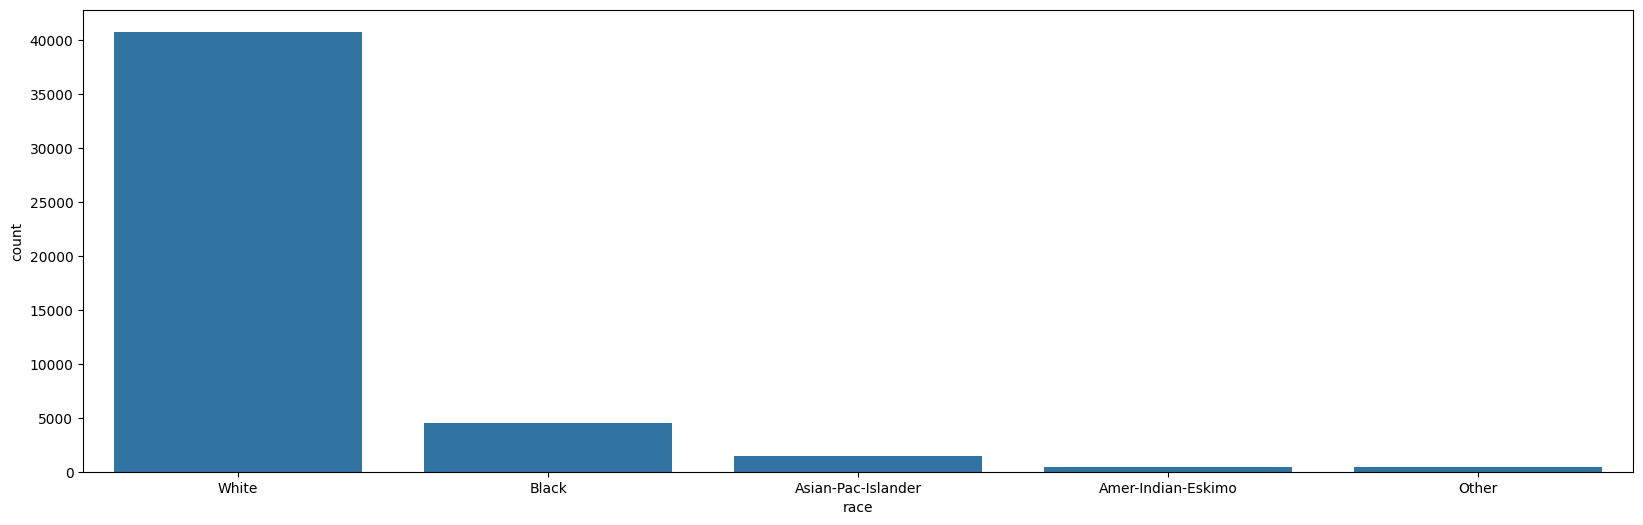

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(df , x = 'race')

In [40]:
df_dis['race'] = df['race']

In [41]:
df['native-country'].value_counts()

United-States                 42958
Mexico                          936
?                               583
Philippines                     293
Germany                         202
Puerto-Rico                     180
Canada                          177
El-Salvador                     153
India                           147
Cuba                            136
England                         123
China                           120
South                           110
Italy                           105
Jamaica                         104
Dominican-Republic              100
Japan                            92
Guatemala                        87
Vietnam                          86
Poland                           85
Columbia                         85
Haiti                            71
Portugal                         65
Taiwan                           64
Iran                             57
Greece                           49
Nicaragua                        49
Peru                        

<Axes: xlabel='native-country', ylabel='count'>

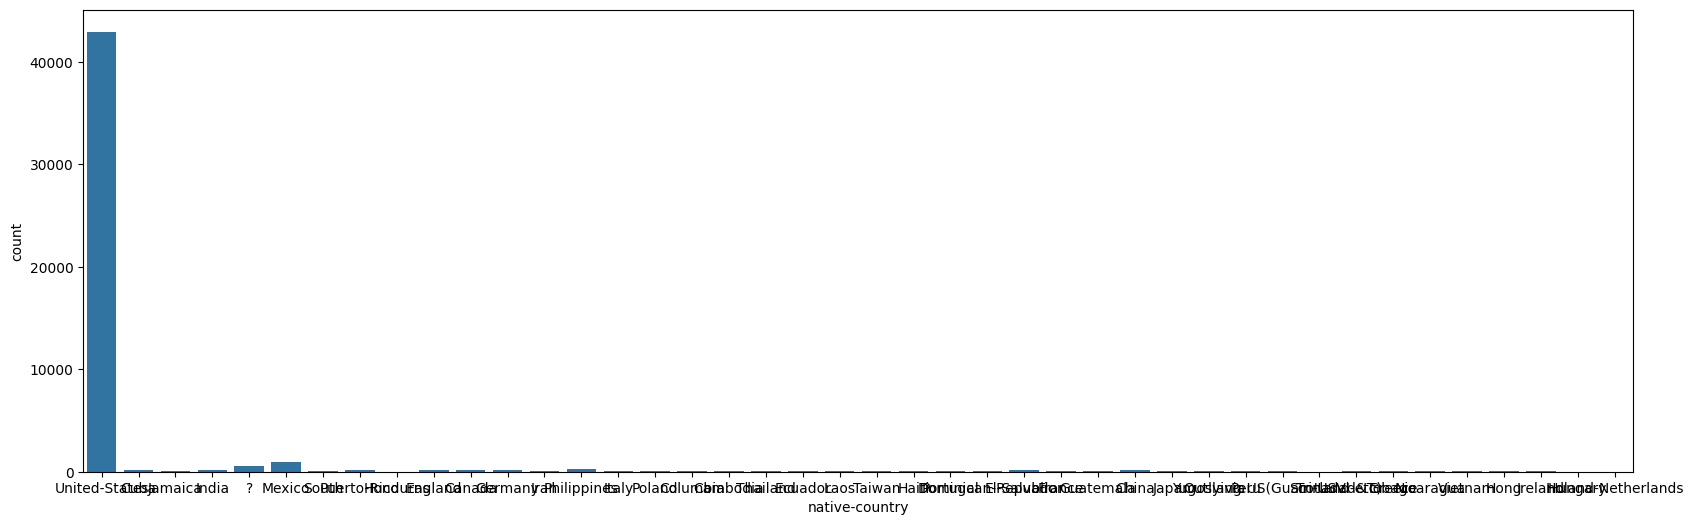

In [42]:
plt.figure(figsize=(20 , 6))
sns.countplot(df , x = 'native-country')

<Axes: xlabel='capital-gain', ylabel='Count'>

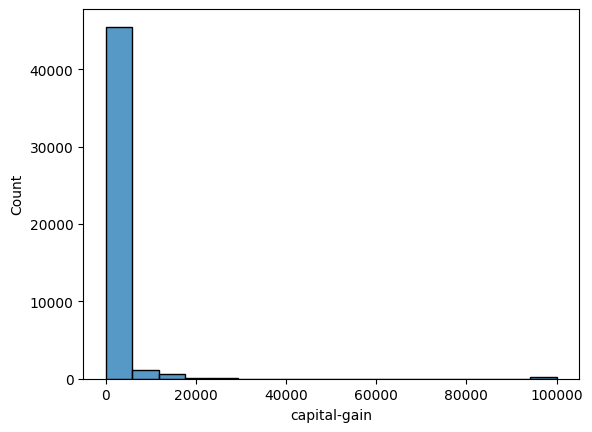

In [43]:
sns.histplot(df , x = 'capital-gain')

<Axes: xlabel='capital-loss', ylabel='Count'>

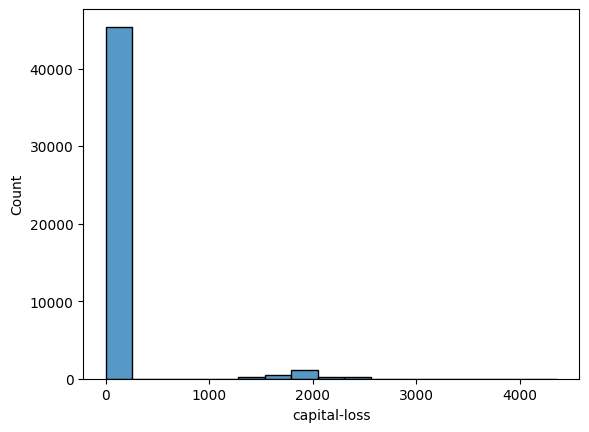

In [44]:
sns.histplot(df , x= 'capital-loss')

<Axes: xlabel='hours-per-week', ylabel='Count'>

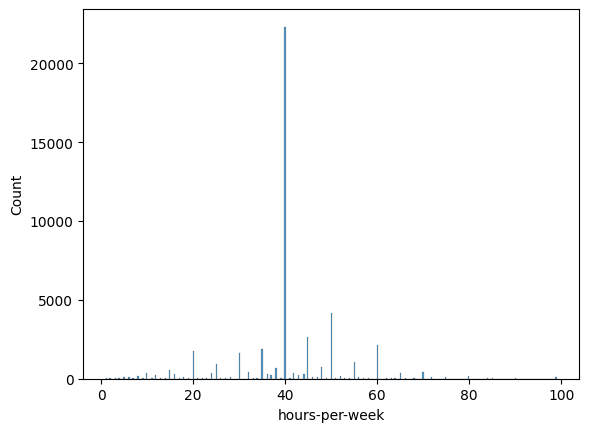

In [45]:
sns.histplot(df , x = 'hours-per-week')

In [46]:
df['hours-per-week'].describe()

count    47621.000000
mean        40.600050
std         12.260345
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [47]:
def f(h):
  if h <= 10:
    return 1
  elif h <= 20:
    return 2
  elif h <= 30:
    return 3
  elif h <= 40:
    return 4
  elif h <= 50:
    return 5
  elif h <= 60:
    return 6
  elif h <= 70:
    return 7
  elif h <= 80:
    return 8
  elif h <= 90:
    return 9
  elif h<= 100:
    return 10

df_dis['weekgroup'] = df['hours-per-week'].apply(f)

In [48]:
df_dis['weekgroup'].value_counts()

4     26063
5      8792
6      3722
3      3255
2      3140
1      1002
7       894
8       444
10      164
9       145
Name: weekgroup, dtype: int64

In [49]:
df_dis.head()

,age group,workclass,education,marital-status,occupation,relationship,race,weekgroup
0,3,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,4
1,4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,2
2,3,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,4
3,5,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,4
4,2,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,4


In [50]:
columns = df_dis.columns
df_dis_onehot = pd.get_dummies(df_dis , columns=columns , prefix = ['agegroup' , 'workclass' , 'education' , 'maritalstatus' , 'occupation' , 'relationship' , 'race' , 'hoursperweek'])

In [51]:
df_dis_onehot.head()

,agegroup_1,agegroup_2,agegroup_3,agegroup_4,agegroup_5,agegroup_6,agegroup_7,agegroup_8,workclass_?,workclass_Federal-gov,...,hoursperweek_1,hoursperweek_2,hoursperweek_3,hoursperweek_4,hoursperweek_5,hoursperweek_6,hoursperweek_7,hoursperweek_8,hoursperweek_9,hoursperweek_10
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
df_dis_onehot.shape

(47621, 76)

In [53]:
df_dis_onehot['sex'] = df['sex'].apply(lambda x: 1 if x =='Male' else 0)

In [54]:
df_dis_onehot.shape

(47621, 77)

In [55]:
df_dis_onehot.isnull().sum()

agegroup_1         0
agegroup_2         0
agegroup_3         0
agegroup_4         0
agegroup_5         0
                  ..
hoursperweek_7     0
hoursperweek_8     0
hoursperweek_9     0
hoursperweek_10    0
sex                0
Length: 77, dtype: int64

In [56]:
df_con.shape

(0, 0)

In [57]:
X = pd.DataFrame(df_dis_onehot)

In [58]:
X.shape

(47621, 77)

In [59]:
y.shape

(47621,)

In [60]:
split1 = int(0.7*len(y))
split2 = int(0.85*len(y))

X_train = X.iloc[:split1 , :]
y_train = y[:split1]
X_test = X.iloc[split1:split2 , :]
y_test = y[split1:split2]
X_val = X.iloc[split2: , :]
y_val = y[split2:]

In [88]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(77,) , activation = 'sigmoid'),
])
keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [89]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 25, batch_size = 100)

Epoch 1/25
334/334 [==============================] - 1s 3ms/step - loss: 0.5702 - accuracy: 0.7011 - val_loss: 0.4657 - val_accuracy: 0.7823
Epoch 2/25
334/334 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8078 - val_loss: 0.4041 - val_accuracy: 0.8202
Epoch 3/25
334/334 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8269 - val_loss: 0.3817 - val_accuracy: 0.8254
Epoch 4/25
334/334 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8296 - val_loss: 0.3707 - val_accuracy: 0.8286
Epoch 5/25
334/334 [==============================] - 1s 4ms/step - loss: 0.3636 - accuracy: 0.8313 - val_loss: 0.3645 - val_accuracy: 0.8316
Epoch 6/25
334/334 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8329 - val_loss: 0.3606 - val_accuracy: 0.8326
Epoch 7/25
334/334 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8339 - val_loss: 0.3579 - val_accuracy: 0.8330
Epoch 

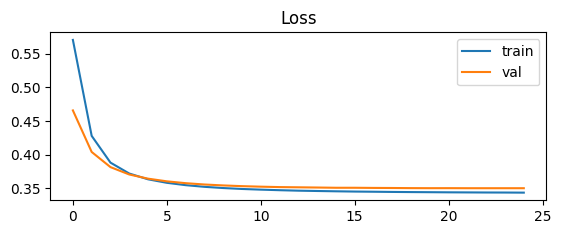

In [90]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label = 'val')
plt.legend()

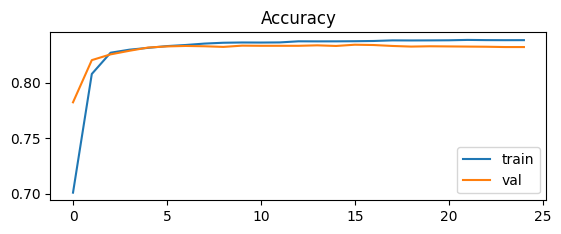

In [91]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'] , label='train')
plt.plot(history.history['val_accuracy'] , label = 'val')
plt.legend()

In [92]:
model.evaluate(X_val , y_val)

#5% more than the baseline score of 78% for neural networks.
# The baseline scores can be found on this link: https://archive.ics.uci.edu/dataset/2/adult

224/224 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8364


[0.35209396481513977, 0.8363661766052246]